# Introduction

In this notebook I was exploring and analyzing data from the Millennium Development Goals(MDG).A set of 8 Goals for 2015were defined by the United Nations to help improve living conditions and the condition of our planet.Key indicators were defined for each of the goals .In this project I had to work with Goal 7 which is to ensure environmental sustainability of carbon dioxide(CO2)emissions protected land and sea areas,and forests.I had to find the measure of central tendency,describe distributions and interpret it's histogram and know what outliers are and know how they affect measures of central tendency. 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib as mpl
from scipy.stats import stats
import warnings
warnings.filterwarnings("ignore")
from scipy.stats.stats import pearsonr

%matplotlib inline

from itertools import chain

In [2]:
df = pd.read_csv("MDG_Export_20191227 (1).csv")

In [3]:
df.head()

,CountryCode,Country,SeriesCode,MDG,Series,1990,Footnotes,Type,1991,Footnotes.1,...,Type.26,2017,Footnotes.27,Type.27,2018,Footnotes.28,Type.28,2019,Footnotes.29,Type.29
0,4,Afghanistan,567,Y,"Proportion of land area covered by forest, per...",2.1,NaN,E,,,...,,,,,,,,,,
1,4,Afghanistan,749,Y,"Carbon dioxide emissions (CO2), thousand metri...",2676.9,NaN,G,2493.6,NaN,...,,,,,,,,,,
2,4,Afghanistan,616,Y,Terrestrial and marine areas protected to tota...,0.36,NaN,C,,,...,,,,,,,,,,
3,8,Albania,567,Y,"Proportion of land area covered by forest, per...",28.8,NaN,C,,,...,,,,,,,,,,
4,8,Albania,749,Y,"Carbon dioxide emissions (CO2), thousand metri...",7488,NaN,G,3971.4,NaN,...,,,,,,,,,,


In [4]:
df.describe()

,CountryCode,SeriesCode
count,690.000000,690.000000
mean,439.465217,644.000000
std,254.138802,76.949647
min,4.000000,567.000000
25%,222.000000,567.000000
50%,439.000000,616.000000
75%,660.000000,749.000000
max,894.000000,749.000000


# Cleaning And Preparing Data

In [5]:
#Replacing all empty string and records with only spaces nan
df1 = df.replace(r'^\s*$', np.nan, regex=True)

#df1

In [6]:
#Removing unncessary columns

df1.drop(["Footnotes",
         "Footnotes.1",
         "Type.1",
         "Footnotes.2",
         "Type.2",
         "Footnotes.3",
         "Type.3",
         "Footnotes.4",
         "Type.4",
         "Footnotes.5", 
         "Type.5",
         "Footnotes.6", 
         "Type.6",
         "Footnotes.7", 
         "Type.7",
         "Footnotes.8",
         "Type.8",
         "Footnotes.9",
         "Type.9",
         "Footnotes.10",
         "Type.10",
         "Footnotes.11",
         "Type.11",
         "Footnotes.12",
         "Type.12",
         "Footnotes.13",
         "Type.13",
         "Footnotes.14",
         "Type.14",
         "Footnotes.15",
         "Type.15",
         "Footnotes.16",
         "Type.16",
         "Footnotes.17",
         "Type.17",
         "Footnotes.18",
         "Type.18",
         "Footnotes.19",
         "Type.19",
         "Footnotes.20",
         "Type.20",
         "Footnotes.21",
         "Type.21",
         "Footnotes.22",
         "Type.22",
         "Footnotes.23",
         "Type.23",
         "Footnotes.24",
         "Type.24",
         "Footnotes.25",
         "Type.25",
         "Footnotes.26",
         "Type.26",
         "Footnotes.27",
         "Type.27",
         "Footnotes.28",
         "Type.28",
         "Footnotes.29",
         "Type.29",
         #"1991",
        # "1992",
        # "1993",
        # "1994",
        # "1995",
         #"1996",
        # "1997",
        # "1998",
        # "1999",
         #"2000",
         #"2001",
         #"2002",
         #"2003",
        # "2004",
         #"2005",
        # "2006",
        # "2007",
         #"2008",
         #"2009",
        # "2010"
         #"2012",
        # "2013",
         #"2014",
         #"2015",
        # "2016",
        # "2017",
         #"2018",
        # "2019"
         ],inplace = True, axis = 1)
#df1


In [7]:
#df1.info()

In [8]:
#Checking unique values

#for i in df1.columns:
   # print("{} is unique: {}".format(i, df1[i].is_unique))
     df1.nunique( axis = 0, dropna = False)

CountryCode    230
Country        230
SeriesCode       3
MDG              1
Series           3
1990           516
Type             4
1991           175
1992           199
1993           195
1994           194
1995           194
1996           199
1997           198
1998           204
1999           200
2000           569
2001           200
2002           205
2003           207
2004           208
2005           391
2006           208
2007           206
2008           206
2009           211
2010           387
2011           208
2012             1
2013             1
2014           202
2015             1
2016             1
2017             1
2018             1
2019             1
dtype: int64

In [9]:
#Statistical summary of my data

def new_data(df1): 
    data_df = {}
    data_df["null_sum"] = df1.isnull().sum()
    data_df["null_pct"] = df1.isnull().mean()
    data_df["dtypes"] = df1.dtypes
    data_df["count"] = df1.count()
    data_df['mean'] = df1.mean()
    data_df['median'] = df1.median()
    data_df['min'] = df1.min()
    data_df['max'] = df1.max()
    
    
    return pd.DataFrame(data_df)
new_data(df1)

,null_sum,null_pct,dtypes,count,mean,median,min,max
1990,63,0.091304,object,627,NaN,22.40,NaN,NaN
1991,508,0.736232,object,182,NaN,3381.00,NaN,NaN
1992,486,0.704348,object,204,NaN,4822.10,NaN,NaN
1993,486,0.704348,object,204,NaN,5221.80,NaN,NaN
1994,485,0.702899,object,205,NaN,5071.50,NaN,NaN
1995,483,0.700000,object,207,NaN,4866.10,NaN,NaN
1996,484,0.701449,object,206,NaN,5306.15,NaN,NaN
1997,481,0.697101,object,209,NaN,5555.50,NaN,NaN
1998,481,0.697101,object,209,NaN,5687.50,NaN,NaN
1999,481,0.697101,object,209,NaN,5093.50,NaN,NaN


In [10]:
#new_data.columns = df1.columns[df1.isnull().any()]
#df[new_data.columns].isnull().sum().sort_values(ascending = False)

In [11]:
df1.dtypes.value_counts()

object     27
float64     7
int64       2
dtype: int64

In [12]:
# Dropping columns with missing values
df2 = df1.replace(np.nan,0,regex = True)#how = 'all', axis = "rows")
df2

,CountryCode,Country,SeriesCode,MDG,Series,1990,Type,1991,1992,1993,...,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
0,4,Afghanistan,567,Y,"Proportion of land area covered by forest, per...",2.1,E,0,0,0,...,2.1,0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0
1,4,Afghanistan,749,Y,"Carbon dioxide emissions (CO2), thousand metri...",2676.9,G,2493.6,1426.5,1375.1,...,8470.8,12251.4,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0
2,4,Afghanistan,616,Y,Terrestrial and marine areas protected to tota...,0.36,C,0,0,0,...,0,0,0.0,0.0,0.46,0.0,0.0,0.0,0.0,0.0
3,8,Albania,567,Y,"Proportion of land area covered by forest, per...",28.8,C,0,0,0,...,28.3,0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0
4,8,Albania,749,Y,"Carbon dioxide emissions (CO2), thousand metri...",7488,G,3971.4,2387.2,2343.2,...,4415.1,4668.1,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
685,894,Zambia,749,Y,"Carbon dioxide emissions (CO2), thousand metri...",2445.9,G,2416.6,2456.9,2500.9,...,2673.2,3047.3,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0
686,894,Zambia,616,Y,Terrestrial and marine areas protected to tota...,36.05,C,0,0,0,...,0,0,0.0,0.0,37.85,0.0,0.0,0.0,0.0,0.0
687,716,Zimbabwe,567,Y,"Proportion of land area covered by forest, per...",57.3,C,0,0,0,...,40.4,0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0
688,716,Zimbabwe,749,Y,"Carbon dioxide emissions (CO2), thousand metri...",15504.1,G,15823.1,16901.2,16208.1,...,9028.2,9860.6,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0


In [13]:
#Checking number of values in each data type

df2.dtypes.value_counts()

object     27
float64     7
int64       2
dtype: int64

# Summary Of Data Types

1.There 27 objects 

2.There 7 floats

3.There are 2 integers

In [14]:
#Checking all the object columns

df2.select_dtypes(include = ["object"]).columns


Index(['Country', 'MDG', 'Series', '1990', 'Type', '1991', '1992', '1993',
       '1994', '1995', '1996', '1997', '1998', '1999', '2000', '2001', '2002',
       '2003', '2004', '2005', '2006', '2007', '2008', '2009', '2010', '2011',
       '2014'],
      dtype='object')

In [15]:
#Checking correlation

df2.corr()


,CountryCode,SeriesCode,2012,2013,2015,2016,2017,2018,2019
CountryCode,1.000000e+00,-1.532248e-17,NaN,NaN,NaN,NaN,NaN,NaN,NaN
SeriesCode,-1.532248e-17,1.000000e+00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2012,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2016,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


There is a perfect negative relationship between Country code and Series code meaning they are inversely proportional.When on increases the other decreases.

# 1.How many different countries are represented? How many missing values are there by country, year and series?

In [16]:
#Checking the number of countries represented
country_name = df2.Country.unique()

print("Number of countries in dataframes =", len(country_name))


Number of countries in dataframes = 230


In [17]:
#Checking missing values in the data frame
df2.isnull().sum().value_counts()

0    36
dtype: int64

There are 0 missing values in the data frame.

In [18]:
#Checking missing values in country

df2["Country"].isnull().any().sum()

0

There are no missing values in the Country column

In [19]:
#Checking missing values in series

df2["Series"].isnull().sum()

0

There are 0 missing values in the Series column.

In [20]:
#Checking missing values in 1990

df2["1990"].isnull().sum()

0

There are 0 missing values in 1990  

In [21]:
#Checking missing values in 2000

df2["2000"].isnull().value_counts()

False    690
Name: 2000, dtype: int64

There are 0 missing values in 2000

In [22]:
#Checking missing values in 2005

df2["2005"].isnull().value_counts()

False    690
Name: 2005, dtype: int64

There are 0 missing values in 2005

In [23]:
#Checking missing values in 2010

df2["2010"].isnull().value_counts()

False    690
Name: 2010, dtype: int64

There are 0 missing values in 2010

In [24]:
#Checking missing values in 2011

df2["2011"].isnull().value_counts()

False    690
Name: 2011, dtype: int64

There are 0 missing values in 2011

All in all year has 0 missing values.

# 2.Who are the top and bottom 5 countries in terms of C02 emissions in 1990 and what are their emissions? How has this changed by 2011?
Do you spot any problems with the data? If so, fix it.

In [25]:
#Creating a new data frame for Country and 1990
df3 = df2.loc[:, ("Country","1990") ]


df3

,Country,1990
0,Afghanistan,2.1
1,Afghanistan,2676.9
2,Afghanistan,0.36
3,Albania,28.8
4,Albania,7488
...,...,...
685,Zambia,2445.9
686,Zambia,36.05
687,Zimbabwe,57.3
688,Zimbabwe,15504.1


In [26]:
df3.dtypes.value_counts()

object    2
dtype: int64

# Data type summary

This data frame has 2 objects

In [27]:
#Dataframe stats summary
df3.describe()

,Country,1990
count,690,690
unique,230,516
top,French Polynesia,0
freq,3,63


In [28]:
#Grouping by country and 1990,then changing data type from object to float 

df4 = df3.groupby("Country")["1990"].apply(lambda country : country.astype(float).sum())
df4

Country
Afghanistan                                         2679.36
Albania                                             7516.95
Algeria                                            78931.47
American Samoa                                        90.06
Andorra                                               41.13
                                                    ...    
Western Sahara                                         2.70
Yemen                                              -2998.60
Yugoslavia [former Socialist Federal Republic]    133288.10
Zambia                                              2552.95
Zimbabwe                                           15578.30
Name: 1990, Length: 230, dtype: float64

In [29]:
#Sorting my dataframe to see the bottom and top 5 countries in descending order in the 1990 column

df4.reset_index().sort_values(["1990"],ascending = True)

,Country,1990
226,Yemen,-2998.60
179,Serbia and Montenegro,0.00
174,San Marino,0.00
204,Tokelau,0.00
131,Monaco,0.18
...,...,...
215,United Kingdom,555919.37
92,India,690601.04
100,Japan,1094358.17
41,China,2460773.08


In [30]:
df4.describe()

count    2.300000e+02
mean     7.168503e+04
std      3.713651e+05
min     -2.998600e+03
25%      8.575250e+01
50%      1.236955e+03
75%      2.138662e+04
max      4.823600e+06
Name: 1990, dtype: float64

# Top 5 countries in 1990 in asdending order and the amount of CO2 emisson

1.United States      =  4823599.85

2.China	             =  2460773.08

3.Japan	             =  1094358.17

4.India	             =  690601.04

5.United Kingdom     =	555919.37

# Bottom 5 countries in 1990 in descdending order and the amount of CO2 emisson

1.Yemen	 = -2998.60

2.San Marino = 0.00

3.Tokelau	= 0.00	 

4.Monaco =	2.18

5.State of Palestine =	2.50

In [31]:
#Creating a new data frame for country and year 2011
df5 = df2.loc[:, ("Country","2011") ]

#Filling missing values using 1
#df5["2011"] = df5["2011"].fillna(1)
df5

,Country,2011
0,Afghanistan,0
1,Afghanistan,12251.4
2,Afghanistan,0
3,Albania,0
4,Albania,4668.1
...,...,...
685,Zambia,3047.3
686,Zambia,0
687,Zimbabwe,0
688,Zimbabwe,9860.6


In [32]:
df5.dtypes.value_counts()

object    2
dtype: int64

In [33]:
#Grouping by country and 2011,then changing data type from object to float 

df6 = df5.groupby("Country")["2011"].apply(lambda country : country.astype(float).sum())
df6

Country
Afghanistan                                        12251.4
Albania                                             4668.1
Algeria                                           121755.4
American Samoa                                         0.0
Andorra                                              491.4
                                                    ...   
Western Sahara                                         0.0
Yemen                                              22295.4
Yugoslavia [former Socialist Federal Republic]         0.0
Zambia                                              3047.3
Zimbabwe                                            9860.6
Name: 2011, Length: 230, dtype: float64

In [34]:
#Reseting and sorting dataframe in the 2011 column
df6.reset_index().sort_values( ["2011"],ascending = False)

,Country,2011
41,China,9019518.2
217,United States,5305569.6
92,India,2074344.9
166,Russian Federation,1808073.0
100,Japan,1187657.0
...,...,...
83,Guam,0.0
179,Serbia and Montenegro,0.0
188,South Sudan,0.0
192,Sudan,0.0


# Top 5 countries in 2011 in desdending order and the amount of CO2 emisson¶

1.China = 9019520.2

2.United States = 5305571.6

3.India = 	2074346.9

4.Russian Federation = 2074346.9

5.Japan = 1187659.0

# Bottom 5 countries in 2011 and the amount of CO2 emisson¶

1.Mayotte = 0.0

2.Sudan	=  0.0

3.South Sudan =  0.0

4.Serbia and Montenegro =  0.0

5.Guam = 0.0



The bottom 5 countries in 2011 had missing values,so I replaced missing values with zero.Also I think in these countries there were no or CO2 emisions at these countries because they are not developed countries and so they don't use fossil fuels and there are a lot of forests there.


# 3.Calculate the mean and median C02 emissions for 1990. Why do you think these values differ?

In [35]:
#statistical summary of data frame 4

df4.describe()

count    2.300000e+02
mean     7.168503e+04
std      3.713651e+05
min     -2.998600e+03
25%      8.575250e+01
50%      1.236955e+03
75%      2.138662e+04
max      4.823600e+06
Name: 1990, dtype: float64

 # Mean

In [36]:
#Checking mean
df4.mean()

71685.03060869566

The mean or overall average is 71685.030

# Median

In [37]:
#Checking median
df4.median()

1236.955

The median is 1236.95.

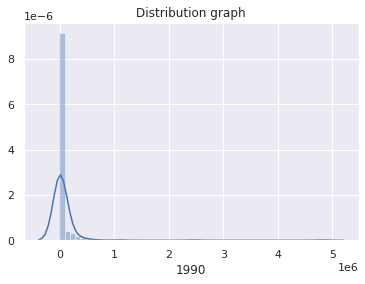

In [77]:
sns.set_style('darkgrid')
sns.distplot(df4)
_=plt.title("Distribution graph")

# 4.Calculate the minimum, maximum and interquartile range of the CO2 emissions for 1990. Using this information, and the mean and median, what does this tell you about the distribution of CO2 emissions?

# Minimum

In [38]:
df4.min()

-2998.6

# Maximum

In [39]:
df4.max()

4823599.85

# InterQuartile Range

In [40]:
q1 = df4.quantile(0.25)
q1

85.7525

In [41]:

q2 = df4.median()
q2

1236.955

In [42]:
q3 = df4.quantile(0.75)
q3

21386.615

In [43]:
iqr = q3 - q1
iqr 

21300.862500000003

The distribution is skewed/ assymetrical distribution because on tail is more than the other.This data is  right-skewed because the right hand side has a longer tail than the left.If this was a normal distribution the mean and the median were gonna be equal,now that the mean is more than the median it means that this distribution is positively(right-skewed)

# 5. Create a histogram of the CO2 emissions for 1990. Is this what you expected from your answers in questions 3 and 4?

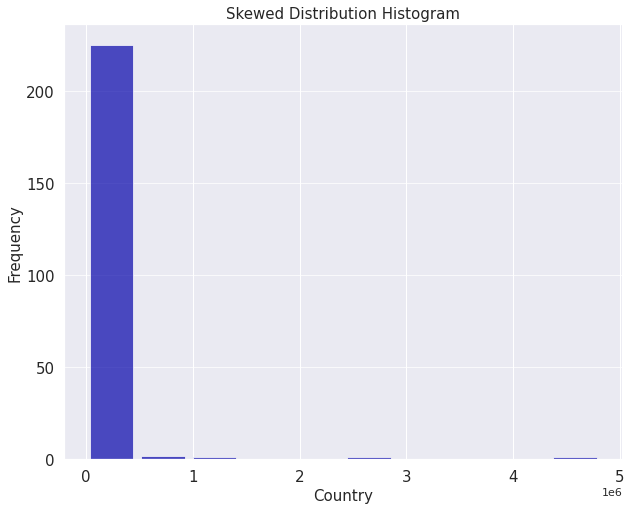

In [80]:
#Histogram graph of CO2 emissions in 1990

plt.figure(figsize=[10,8])
n, bins, patches = plt.hist(df4, bins=10, color='#0504aa',alpha=0.7, rwidth=0.85)
plt.grid(axis='y', alpha=0.75)
plt.xlabel('Country',fontsize=15)
plt.ylabel('Frequency',fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
maxfreq = df4.max()
minfreq = df4.min()
plt.ylabel('Frequency',fontsize=15)
plt.title('Skewed Distribution Histogram',fontsize=15)
plt.show()

Yes this is what I expected because the distribution is skewed.

# 6.Calculate the standard deviation and standard error of the mean for CO2 emissions in 1990. How is the standard error different from the standard deviation?

# Standard deviation

In [46]:
df4.std()

371365.112172181

# Standard error mean

In [47]:
df4.sem()

24487.090346677225

Standard deviation measures dispersion for a subject set of data from mean wjile standard error measures how far the sample mean of data is likely to be from true population mean.

# 7.Create a line graph to show C02 emissions in Brazil, Russia, China, India, the USA and South Africa over time. What does the graph tell you about the difference and change in C02 emissions in these countries?

In [48]:
#Locating countries
BRZ = df2["Country"][df2["Country"] == "Brazil"]
CHN = df2["Country"][df2["Country"] == "China"]
IND = df2["Country"][df2["Country"] == "India"]
RSA = df2["Country"][df2["Country"] == "South Africa"]
RSF = df2["Country"][df2["Country"] == "Russian Federation"]
USA = df2["Country"][df2["Country"] == "United States"]

#Displaying posotions of the countries 

display(BRZ,CHN,IND,RSA,RSF,USA)


81    Brazil
82    Brazil
83    Brazil
Name: Country, dtype: object

123    China
124    China
125    China
Name: Country, dtype: object

276    India
277    India
278    India
Name: Country, dtype: object

561    South Africa
562    South Africa
563    South Africa
Name: Country, dtype: object

498    Russian Federation
499    Russian Federation
500    Russian Federation
Name: Country, dtype: object

651    United States
652    United States
653    United States
Name: Country, dtype: object

In [49]:
#Creating a new data frame

df7 = df2.loc[(82,124,277,563,499,652),("Country","1990","1991","1992","1993","1994","1995",
                                        "1996","1997","1998","1999","2000","2001","2002",
                                        "2003","2004","2005","2006","2007","2008","2009","2010",
                                        "2011","2012","2013","2014","2015","2016","2017",
                                        "2018","2019")]
#Filling missing values with 1                                        
#df7.fillna(1,inplace = True)
df7

,Country,1990,1991,1992,1993,1994,1995,1996,1997,1998,...,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
82,Brazil,208887,219330.6,220705.7,230738.6,242154,258347.5,284782.9,300547.3,312289.1,...,419754.2,439412.9,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0
124,China,2460744,2584538.3,2695982.1,2878694,3058241.3,3320285.2,3463089.1,3469510,3324344.5,...,8256969.2,9019518.2,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0
277,India,690576.8,737851.7,783634.2,814297.7,864931.6,920046.6,1002224.1,1043939.9,1071911.8,...,1950950.3,2074344.9,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0
563,South Africa,2.58,0,0,0,0,0,0,0,0,...,0,0,0.0,0.0,10.24,0.0,0.0,0.0,0.0,0.0
499,Russian Federation,0,0,2081840.2,1941203.5,1701132.3,1634312.2,1615804.9,1528849.3,1498343.5,...,1742540.1,1808073,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0
652,United States,4823557.1,4822383.7,4911103.1,5032931.8,5098475.8,5138009.7,5260696.5,5375235.3,5410918.9,...,5408869,5305569.6,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0


In [50]:
#Grouping and changing data types using callable function lambda
df8 = df7.groupby("Country")["1990","1991","1992","1993","1994","1995",
                                        "1996","1997","1998","1999","2000","2001","2002",
                                        "2003","2004","2005","2006","2007","2008","2009","2010",
                                        "2011","2012","2013","2014","2015","2016","2017",
                                        "2018","2019"].apply(lambda country : country.astype(float).sum())
df8

,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,...,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
Country,,,,,,,,,,,,,,,,,,,,,
Brazil,208887.00,219330.6,220705.7,230738.6,242154.0,258347.5,284782.9,300547.3,312289.1,320173.1,...,419754.2,439412.9,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0
China,2460744.00,2584538.3,2695982.1,2878694.0,3058241.3,3320285.2,3463089.1,3469510.0,3324344.5,3318055.6,...,8256969.2,9019518.2,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0
India,690576.80,737851.7,783634.2,814297.7,864931.6,920046.6,1002224.1,1043939.9,1071911.8,1144390.0,...,1950950.3,2074344.9,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0
Russian Federation,0.00,0.0,2081840.2,1941203.5,1701132.3,1634312.2,1615804.9,1528849.3,1498343.5,1533968.4,...,1742540.1,1808073.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0
South Africa,2.58,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,10.24,0.0,0.0,0.0,0.0,0.0
United States,4823557.10,4822383.7,4911103.1,5032931.8,5098475.8,5138009.7,5260696.5,5375235.3,5410918.9,5510430.2,...,5408869.0,5305569.6,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0


In [51]:
df8.dtypes.value_counts()

float64    30
dtype: int64

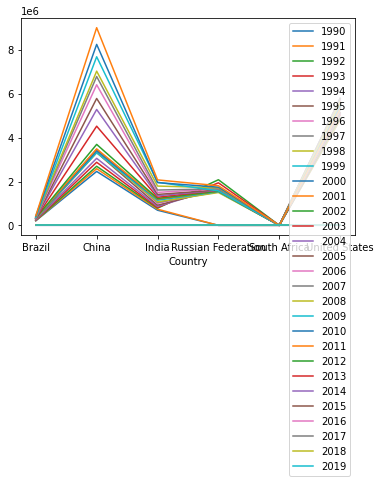

In [52]:
df8.plot()
plt.show()

# 8.What is the mean and standard deviation for land area covered by forest in 1990? Why do you think the standard deviation is so large?

In [53]:
df8.describe()

,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,...,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
count,6.000000e+00,6.000000e+00,6.000000e+00,6.000000e+00,6.000000e+00,6.000000e+00,6.000000e+00,6.000000e+00,6.000000e+00,6.000000e+00,...,6.000000e+00,6.000000e+00,6.0,6.0,6.000000,6.0,6.0,6.0,6.0,6.0
mean,1.363961e+06,1.394017e+06,1.782211e+06,1.816311e+06,1.827489e+06,1.878500e+06,1.937766e+06,1.953014e+06,1.936301e+06,1.971170e+06,...,2.963180e+06,3.107820e+06,0.0,0.0,1.706667,0.0,0.0,0.0,0.0,0.0
std,1.932881e+06,1.942578e+06,1.861529e+06,1.913529e+06,1.949851e+06,1.991736e+06,2.041307e+06,2.076661e+06,2.065201e+06,2.089329e+06,...,3.217751e+06,3.444260e+06,0.0,0.0,4.180462,0.0,0.0,0.0,0.0,0.0
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
25%,5.222368e+04,5.483265e+04,3.614378e+05,3.766284e+05,3.978484e+05,4.237723e+05,4.641432e+05,4.863954e+05,5.021948e+05,5.262273e+05,...,7.504507e+05,7.815779e+05,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
50%,4.497319e+05,4.785911e+05,1.432737e+06,1.377751e+06,1.283032e+06,1.277179e+06,1.309014e+06,1.286395e+06,1.285128e+06,1.339179e+06,...,1.846745e+06,1.941209e+06,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
75%,2.018202e+06,2.122867e+06,2.542447e+06,2.644321e+06,2.718964e+06,2.898792e+06,3.001268e+06,2.984345e+06,2.867844e+06,2.872034e+06,...,4.544389e+06,4.497763e+06,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
max,4.823557e+06,4.822384e+06,4.911103e+06,5.032932e+06,5.098476e+06,5.138010e+06,5.260696e+06,5.375235e+06,5.410919e+06,5.510430e+06,...,8.256969e+06,9.019518e+06,0.0,0.0,10.240000,0.0,0.0,0.0,0.0,0.0


In [54]:
df8["1990"].mean()

1363961.2466666666

In [55]:
df8["1990"].std()

1932881.399958072

# 9.Create histograms for land area covered by forest and percentage of area protected in 1990. Describe the distributions.

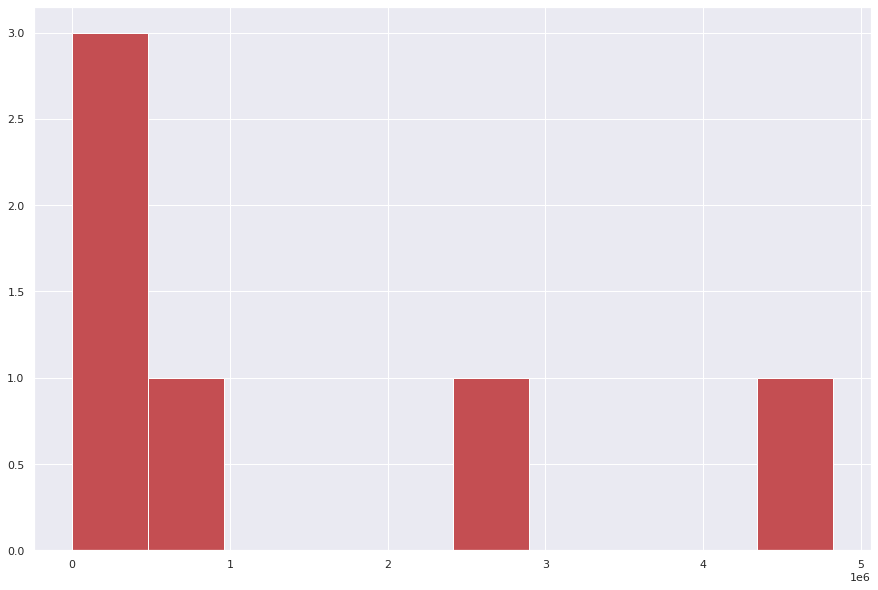

In [56]:
sns.set()
_ = plt.figure(figsize = (15,10))
_ = plt.hist(df8["1990"],color = 'r', stacked = False, orientation = "vertical")
#plt.xlabel("Country")
#plt.ylabel("CO2 emissions ")
#plt.title("CO2 emissions in 1990")
#plt.show()